In [1]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

Total Income: 13756.05
Income: category
INCOME    13197.03
OTHER       559.02
Name: transaction, dtype: float64
Total Expense: 17823.86
Expense: category
CREDIT CARD     -2294.56
EXPENSE          -340.63
OTHER           -1508.02
PROPERTY       -13045.68
SUBSCRIPTION      -20.00
UTILITIES        -614.97
Name: transaction, dtype: float64
Category: category
CREDIT CARD     -12.87%
EXPENSE          -1.91%
OTHER            -8.46%
PROPERTY        -73.19%
SUBSCRIPTION     -0.11%
UTILITIES        -3.45%
Name: transaction, dtype: object


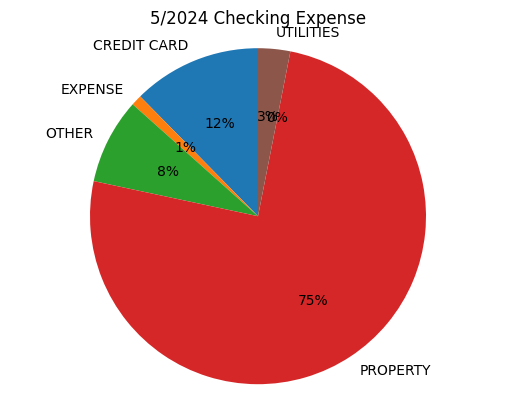

In [3]:
analyzer.analyzeChecking(5, 2024)

Total Expense: 1567.9
Expense: category
DINING            48.91
ENTERTAINMENT     15.00
HEALTH CARE      802.83
OTHER            221.48
SERVICE            0.03
SHOPPING         266.83
SUBSCRIPTION     187.82
UTILITIES         25.00
Name: transaction, dtype: float64
Category: category
DINING            3.12%
ENTERTAINMENT     0.96%
HEALTH CARE       51.2%
OTHER            14.13%
SERVICE            0.0%
SHOPPING         17.02%
SUBSCRIPTION     11.98%
UTILITIES         1.59%
Name: transaction, dtype: object


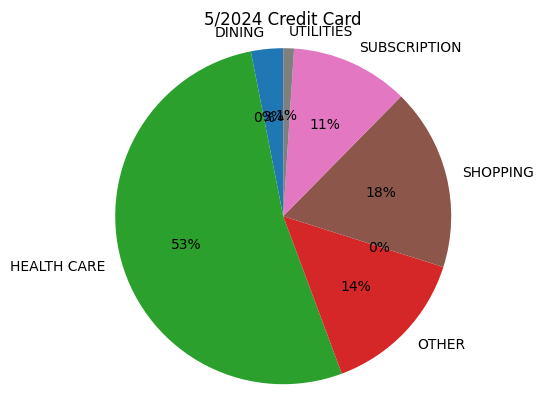

In [4]:
analyzer.analyzeCreditCard(5, 2024)

Expense: category
DINING          -33.72
HEALTH CARE    -802.83
OTHER          -217.15
SHOPPING         -3.65
SUBSCRIPTION     -2.99
UTILITIES       -25.00
Name: transaction, dtype: float64


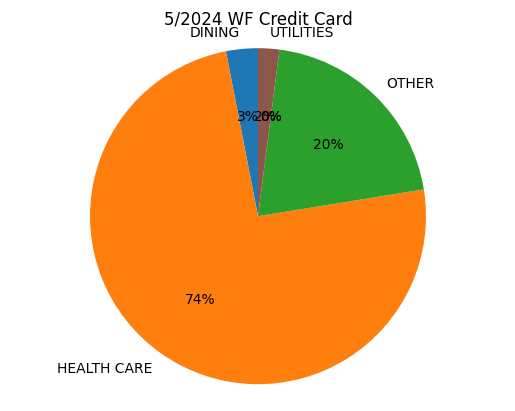

In [5]:
# Import Wells Fargo
wfDf = load.importWF('./input/credit/wf/5_2024.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '5/2024 WF Credit Card')